In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import pandas as pd

In [87]:
df=pd.read_csv("/content/drive/MyDrive/Data_Set/advertising.csv")

In [88]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [90]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [91]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<Figure size 1000x500 with 0 Axes>

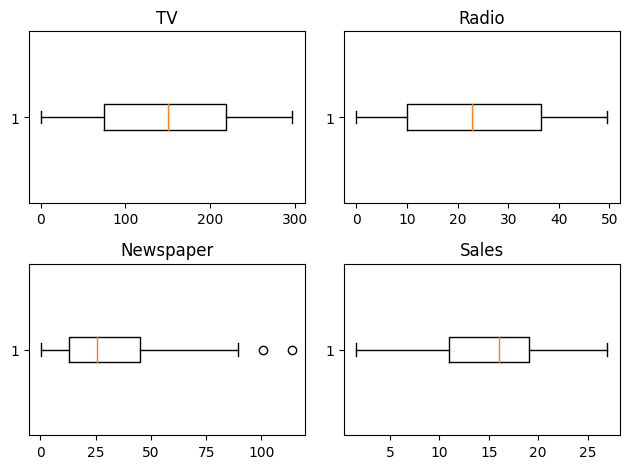

In [94]:
plt.figure(figsize=(10, 5))
fig, axes = plt.subplots(2, 2)
axes[0, 0].boxplot(df['TV'], vert=False)
axes[0, 0].set_title('TV')
axes[0, 1].boxplot(df['Radio'], vert=False)
axes[0, 1].set_title('Radio')
axes[1, 0].boxplot(df['Newspaper'], vert=False)
axes[1, 0].set_title('Newspaper')

axes[1, 1].boxplot(df['Sales'], vert=False)
axes[1, 1].set_title('Sales')
plt.tight_layout()
plt.show()

In [95]:
q1 = df['Newspaper'].quantile(0.25)
q3 = df['Newspaper'].quantile(0.75)
iqr = q3 - q1
lower_val = q1 - 1.5 * iqr
upper_val = q3 + 1.5 * iqr


In [96]:
outliers_ = df[df['Newspaper'] > upper_val]
outliers_

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


<Figure size 3000x500 with 0 Axes>

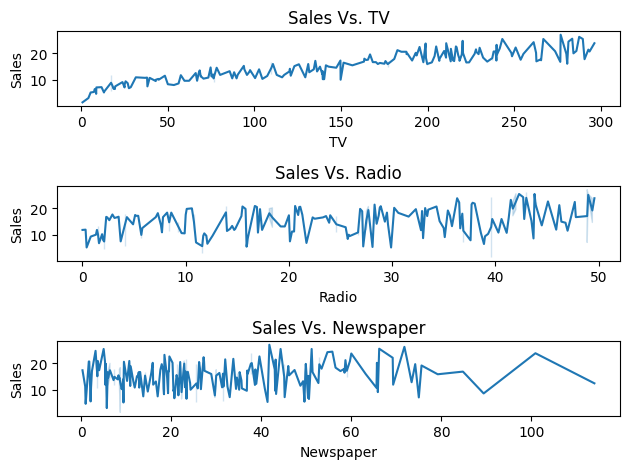

In [97]:
plt.figure(figsize=(30, 5))
fig, axes = plt.subplots(3, 1)

sns.lineplot(data=df, y='Sales', x='TV', ax=axes[0])
axes[0].set_title('Sales Vs. TV')

sns.lineplot(data=df, y='Sales', x='Radio', ax=axes[1])
axes[1].set_title('Sales Vs. Radio')

sns.lineplot(data=df, y='Sales', x='Newspaper', ax=axes[2])
axes[2].set_title('Sales Vs. Newspaper')
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

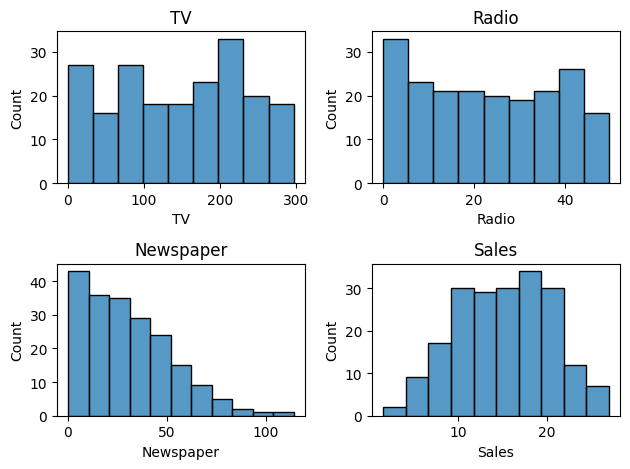

In [98]:
plt.figure(figsize=(10,5))
fig , axes = plt.subplots(2,2)

sns.histplot(df['TV'], ax=axes[0, 0])
axes[0, 0].set_title('TV')

sns.histplot(df['Radio'], ax=axes[0, 1])
axes[0, 1].set_title('Radio')

sns.histplot(df['Newspaper'], ax=axes[1, 0])
axes[1, 0].set_title('Newspaper')

sns.histplot(df['Sales'], ax=axes[1, 1])
axes[1, 1].set_title('Sales')

plt.tight_layout()
plt.show()

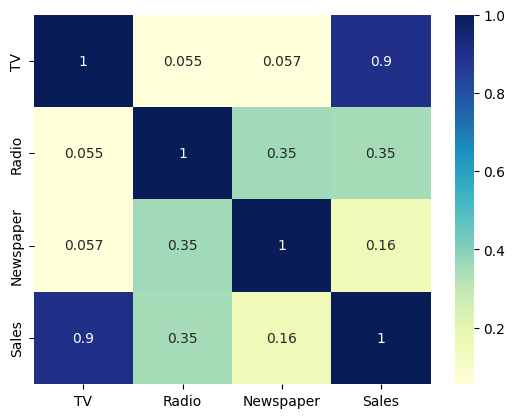

In [99]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [100]:
X = df['TV']
y = df['Sales']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [102]:
import statsmodels.api as sm

In [103]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [104]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [105]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.52e-52
Time:                        09:16:50   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

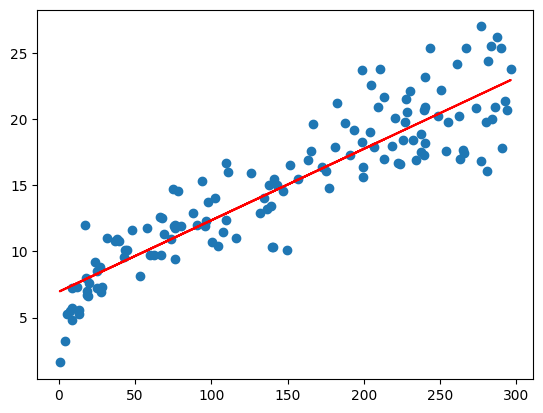

In [106]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [107]:
# Custom input for TV advertising expenditure
custom_input = 300

custom_input_with_const = [1, custom_input]

# Predicting the sales using the fitted model
predicted_sales = lr.predict(custom_input_with_const)

print(f"Predicted Sales for TV advertising expenditure of {custom_input}: {predicted_sales[0]}")


Predicted Sales for TV advertising expenditure of 300: 23.31240907477374


In [108]:
# Prepare feature matrix X
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

X_train_sm = sm.add_constant(X_train)

mlr = sm.OLS(y_train, X_train_sm).fit()
print(mlr.summary())

# Predicting using the test set
X_test_sm = sm.add_constant(X_test)
y_pred = mlr.predict(X_test_sm)
custom_input = [44.5, 39.3, 45.1]  # TV, Radio, Newspaper
custom_input_with_const = sm.add_constant([custom_input], has_constant='add')

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           4.73e-71
Time:                        09:16:50   Log-Likelihood:                -270.60
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3346      0.357     12.139      0.0

In [109]:
# Predicting using the custom input
predicted_sales = mlr.predict(custom_input_with_const)

print(f"Predicted Sales for TV: {custom_input[0]}, Radio: {custom_input[1]}, Newspaper: {custom_input[2]} is {predicted_sales[0]}")

Predicted Sales for TV: 44.5, Radio: 39.3, Newspaper: 45.1 is 11.337149133714846
